In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

## Vers1 data

In [2]:
df1_list = []
is_first = True
index = 0
for f in os.listdir("./sensitive/"):
    if 'vers1' in f:
        path = os.path.join("./sensitive/", f)
        df_c = pd.read_csv(path, header = None)
        if is_first == True:
            df_c = df_c[[0,3]]
            df_c.columns = ['text','f1_{}'.format(index)]
            is_first = False
        else:
            df_c = df_c[3]
            df_c.columns = pd.Index(['f1_{}'.format(index)])
        df_c = df_c[:19]
        index += 1
#         print(df_c.columns)
        df1_list.append(df_c)

In [3]:
df1 = pd.concat(df1_list,1)

In [4]:
df1.columns = ['text',1,2,3]

In [5]:
df1

,text,1,2,3
0,offline_crime,0.48,0.60,0.46
1,online_crime,0.54,0.71,0.45
2,drugs,0.87,0.88,0.81
3,gambling,0.52,0.79,0.65
4,pornography,0.60,0.71,0.52
5,prostitution,0.78,0.65,0.76
6,slavery,0.75,0.67,0.65
7,suicide,0.31,0.39,0.14
8,terrorism,0.59,0.61,0.53
9,weapons,0.84,0.88,0.85


In [6]:
df1.head()

,text,1,2,3
0,offline_crime,0.48,0.60,0.46
1,online_crime,0.54,0.71,0.45
2,drugs,0.87,0.88,0.81
3,gambling,0.52,0.79,0.65
4,pornography,0.60,0.71,0.52


In [7]:
average = []
for i,el in df1.iterrows():
    curr_list = []
    for c in list(df1.columns)[1:]:
        curr_list.append(el[c])
    average.append(round(np.mean(curr_list),2))
df1['av'] = average
df1.head()

,text,1,2,3,av
0,offline_crime,0.48,0.60,0.46,0.51
1,online_crime,0.54,0.71,0.45,0.57
2,drugs,0.87,0.88,0.81,0.85
3,gambling,0.52,0.79,0.65,0.65
4,pornography,0.60,0.71,0.52,0.61


In [8]:
# df1 = df1.sort_values(by=['av'],ascending = False)

df1 = df1.sort_values(by=['text'],ascending = False)

In [9]:
err_list = []
for i,el in df1.iterrows():
    curr_list = []
    for c in list(df1.columns)[1:-1]:
        curr_list.append(el[c]) 
#     print(el['av'])
    min_err = el['av'] - min(curr_list) 
    max_err = max(curr_list)  - el['av']
#     print(min_err,max_err)
    max_curr_err = max(min_err,max_err)
#     print("max_curr_err", max_curr_err)
    err_list.append(max_curr_err)
#     print("="*100)
#     break

df1['max_err'] = err_list

In [10]:
df1.head()

,text,1,2,3,av,max_err
9,weapons,0.84,0.88,0.85,0.86,0.02
8,terrorism,0.59,0.61,0.53,0.58,0.05
7,suicide,0.31,0.39,0.14,0.28,0.14
17,social_injustice,0.46,0.55,0.47,0.49,0.06
6,slavery,0.75,0.67,0.65,0.69,0.06


## Vers2 data

In [11]:
df2_list = []
is_first = True
index = 0
for f in os.listdir("./sensitive/"):
    if 'vers2' in f:
        path = os.path.join("./sensitive/", f)
        df_c = pd.read_csv(path, header = None)
        if is_first == True:
            df_c = df_c[[0,3]]
            df_c.columns = ['text','f1_{}'.format(index)]
            is_first = False
        else:
            df_c = df_c[3]
            df_c.columns = pd.Index(['f1_{}'.format(index)])
        df_c = df_c[:19]
        index += 1
#         print(df_c.columns)
        df2_list.append(df_c)

In [12]:
df2 = pd.concat(df2_list,1)

In [13]:
df2.columns = ['text',1,2,3]

In [14]:
df2

,text,1,2,3
0,offline_crime,0.47,0.54,0.54
1,online_crime,0.50,0.55,0.52
2,drugs,0.81,0.85,0.86
3,gambling,0.60,0.67,0.61
4,pornography,0.57,0.68,0.60
5,prostitution,0.70,0.79,0.79
6,slavery,0.74,0.73,0.66
7,suicide,0.44,0.59,0.29
8,terrorism,0.59,0.52,0.56
9,weapons,0.88,0.90,0.83


In [15]:
average = []
for i,el in df2.iterrows():
    curr_list = []
    for c in list(df2.columns)[1:]:
        curr_list.append(el[c])
    average.append(round(np.mean(curr_list),2))
df2['av'] = average
df2.head()

,text,1,2,3,av
0,offline_crime,0.47,0.54,0.54,0.52
1,online_crime,0.50,0.55,0.52,0.52
2,drugs,0.81,0.85,0.86,0.84
3,gambling,0.60,0.67,0.61,0.63
4,pornography,0.57,0.68,0.60,0.62


In [16]:
# df2 = df2.sort_values(by=['av'],ascending = False)

df2 = df2.sort_values(by=['text'],ascending = False)

In [17]:
err_list = []
for i,el in df2.iterrows():
    curr_list = []
    for c in list(df2.columns)[1:-1]:
        curr_list.append(el[c]) 
#     print(el['av'])
    min_err = el['av'] - min(curr_list) 
    max_err = max(curr_list)  - el['av']
#     print(min_err,max_err)
    max_curr_err = max(min_err,max_err)
#     print("max_curr_err", max_curr_err)
    err_list.append(max_curr_err)
#     print("="*100)
#     break

df2['max_err'] = err_list

In [18]:
df2.head()

,text,1,2,3,av,max_err
9,weapons,0.88,0.90,0.83,0.87,0.04
8,terrorism,0.59,0.52,0.56,0.56,0.04
7,suicide,0.44,0.59,0.29,0.44,0.15
17,social_injustice,0.45,0.47,0.43,0.45,0.02
6,slavery,0.74,0.73,0.66,0.71,0.05


In [19]:
df2.text.tolist() == df1.text.tolist() 

True

In [20]:
df2.text.tolist()

['weapons',
 'terrorism',
 'suicide',
 'social_injustice',
 'slavery',
 'sexual_minorities',
 'sexism',
 'religion',
 'racism',
 'prostitution',
 'pornography',
 'politics',
 'online_crime',
 'offline_crime',
 'none',
 'health_shaming',
 'gambling',
 'drugs',
 'body_shaming']

In [21]:
df1.text.tolist() 

['weapons',
 'terrorism',
 'suicide',
 'social_injustice',
 'slavery',
 'sexual_minorities',
 'sexism',
 'religion',
 'racism',
 'prostitution',
 'pornography',
 'politics',
 'online_crime',
 'offline_crime',
 'none',
 'health_shaming',
 'gambling',
 'drugs',
 'body_shaming']

## Plot

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticks'

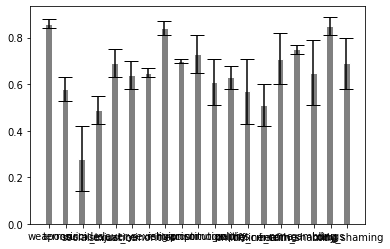

In [22]:
barWidth = 0.05
# color_list =['red', 'green', 'blue'] * 6
color_list =['gray'] * 18

x_topics = np.arange(len(df1))

# plt.bar(topics_replaced, list(df['av']), width = 0.5, color = 'gray', edgecolor = 'white',
#         yerr=list(df['max_err']), capsize=7)

plt.bar(df1.text.tolist(), list(df1['av']), width = 0.4, color = 'grey', edgecolor = 'white',  yerr=list(df1['max_err']), capsize=7 )
    
x_positions = [r + barWidth for r in range(len(df1))]

plt.xticks(x_positions, df1.text.tolist())

plt.set_xticks(x_topics)
plt.set_xticklabels(topics_labels)

plt.xticks(rotation = 85, fontsize=14)
plt.ylabel('F-score', fontsize=18)
plt.legend()

# plt.plot(x_positions, list(df['av']), 'o', color='black', markersize=3);
plt.tight_layout()

# Show graphic
plt.show()

# plt.savefig("conf_intervals.pdf",format='pdf', bbox_inches='tight')

In [23]:
x_topics

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

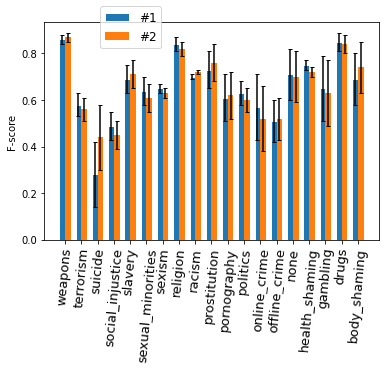

In [24]:
# plt.figure(figsize=(16,14))

fig, ax = plt.subplots()
topic_width = 0.35
x_topics = np.arange(len(df1))


# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

rects1 = ax.bar(x_topics - topic_width/2, df1.av.tolist(), topic_width, label='#1',yerr=list(df1['max_err']), capsize=2,edgecolor = 'white')
rects2 = ax.bar(x_topics + topic_width/2, df2.av.tolist(), topic_width, label='#2',yerr=list(df1['max_err']), capsize=2,)

# rects2 = ax.bar(x_topics + topic_width/2, multi_dataset_count, topic_width, color='r', label = 'Sensitive dataset')

ax.set_xticks(x_topics)
ax.set_xticklabels(df1.text.tolist())

plt.xticks(rotation = 85, fontsize=13)
ax.set_ylabel('F-score')
# ax.set_title('Scores by group and gender')
# ax.legend(loc='best')

ax.legend(bbox_to_anchor=(0.15, 1.1), loc='upper left',fontsize=12)

# 

plt.show()
# plt.savefig("counts.pdf",format='pdf', bbox_inches='tight')

## Average

In [43]:
vers1_fscore_weighted = [0.64,0.73, 0.66]
vers2_fscore_weighted = [0.65,0.7, 0.66]


In [46]:
np.mean(vers1_fscore_weighted), np.mean(vers2_fscore_weighted)

(0.6766666666666667, 0.67)